#        　　　　  　　　프로그래밍III 기말대체과제

<div style="text-align: right"> 201704232 산업데이터 사이언스학부 </div>

<div style="text-align: right">  이진수 </div>

---

## 이동 통신 사용자 데이터 설명

In [1]:
import pandas as pd
import numpy as np
tel = pd.read_csv('telco.csv')

In [2]:
tel # 이동통신 총 사용자는 3333명이다.

,Leave,MemberWeeks,NewContract,IsData,DataAmount,Callcenter,CalMins,CalCounts,MonthlyFee,OverFee,RoamingMin
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


Leave	가입해지여부(1이면 해지) <br>
MemberWeeks	가입기간 <br>
NewContract	가입갱신여부(1이면 갱신) <br>
IsData	데이터요금제사용여부(1이면 사용)  <br>
DataAmount	데이터사용량(GB) <br>
Callcenter	고객센터전화량 <br>
CalMins	월평균전화량(분) <br>
CalCounts	월평균전화수(횟수) <br>
MonthlyFee	월평균요금 <br>
OverFee	초과요금 <br>
RoamingMin	로밍시간(분)

In [3]:
tel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Leave        3333 non-null   int64  
 1   MemberWeeks  3333 non-null   int64  
 2   NewContract  3333 non-null   int64  
 3   IsData       3333 non-null   int64  
 4   DataAmount   3333 non-null   float64
 5   Callcenter   3333 non-null   int64  
 6   CalMins      3333 non-null   float64
 7   CalCounts    3333 non-null   int64  
 8   MonthlyFee   3333 non-null   float64
 9   OverFee      3333 non-null   float64
 10  RoamingMin   3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [4]:
tel.Leave.value_counts() #가입해지 여부가 있는 사람들은 총 483명이다.

0    2850
1     483
Name: Leave, dtype: int64

## 가입기간에 따른 고객 수

<AxesSubplot:>

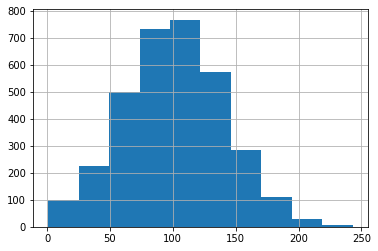

In [5]:
tel.MemberWeeks.hist(bins=10)

100~125주 약 25개월부터 32개월까지의 고객들이 많다.

##  가입해지 여부가 있는 이용자들의 고객센터 전화량과 없는 이용자들의 고객센터 전화량 평균 비교

저는 가입 해지 여부가 있는 이용자는 불만을 가지고 있기에 가입 해지할 여부가 있다는 것이라 생각한다.
<br>그래서 가입해지를 한 사람들의 고객 센터 전화량의 평균 얼마나 되는지 알아보았다.

In [6]:
tel_le1 = (tel['Leave']==1) #해지 여부가 있는 사람
tel_le0 = (tel['Leave']==0) #해지 여부가 없는 사람

In [7]:
tel_call_1 = tel.Callcenter.loc[tel_le1,] #해지 여부가 있는 사람들의 고객센터 전화량
tel_call_1

10      4
15      4
21      5
33      1
41      0
       ..
3301    0
3304    4
3320    4
3322    4
3323    5
Name: Callcenter, Length: 483, dtype: int64

Length가 483으로 가입해지 여부가 있는 이용자의 수는 483명이다.

In [8]:
tel_call_1.sort_values() #최대 9번까지 한 사람도 있다.

2158    0
2119    0
2118    0
2115    0
2710    0
       ..
1694    7
1865    7
1912    8
2380    9
542     9
Name: Callcenter, Length: 483, dtype: int64

<AxesSubplot:>

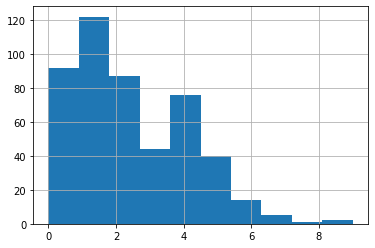

In [9]:
tel_call_1.hist()

In [10]:
round(tel_call_1.mean(),1) #해지 여부가 없는 사람들의 평균 고객센터 전화량

2.2

In [11]:
tel_call_0 = tel.Callcenter.loc[tel_le0,] #해지 여부가 없는 사람들의 고객센터 전화량
tel_call_0

0       1
1       1
2       0
3       2
4       3
       ..
3328    2
3329    3
3330    2
3331    2
3332    0
Name: Callcenter, Length: 2850, dtype: int64

가입 해지 여부가 없는 이용자의 수는 총 2850명이다.

In [12]:
tel_call_0.sort_values()

3332    0
751     0
2255    0
2247    0
763     0
       ..
522     7
2953    7
1831    7
902     7
1502    8
Name: Callcenter, Length: 2850, dtype: int64

In [13]:
tel_call_0.value_counts()

1    1059
2     672
0     605
3     385
4      90
5      26
6       8
7       4
8       1
Name: Callcenter, dtype: int64

<AxesSubplot:>

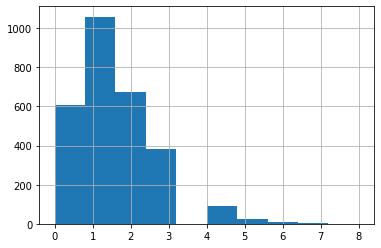

In [14]:
tel_call_0.hist()
# 대부분 1번은 했지만 그이후로 많이 하지는 않았다.

In [15]:
round(tel_call_0.mean(),1) #해지 안한 사람들의 평균 고객센터 전화량

1.4

#### 해지 여부 있는 사람들의 고객센터 전화량 평균 : 2.2
#### 해지 여부 없는 사람들의 고객센터 전화량 평균 : 1.4

### 해지 여부가 있는 인원 : 483명   　　　　    해지 여부가 없는 인원 : 2850명
### 해지 여부 있는 사용자들의 고객센터 전화량 평균이 여부가 없는 사용자들보다 높다는 것을 알 수 있다. 


---

## 데이터 요금제를 사용할 여부가 있는 이용자와 없는 이용자들의 수

In [16]:
tel_data = (tel['IsData']==0) 
tel_data.value_counts()

True     2411
False     922
Name: IsData, dtype: int64

데이터 요금제를 사용할 여부가 있는 사람 : 2411명 <br>
데이터 요금제를 사용할 여부가 없는 사람 : 922명

## 사람들의 평균 데이터 사용량

In [17]:
round(tel['DataAmount'].mean(),2)

0.82

사람들의 평균 데이터 사용량은 0.82GB 이다.

## 데이터를 가장 많이 사용한 사람

In [18]:
max(tel['DataAmount'])

5.4

제일 데이터를 많이 사용한 이용자는 5.4GB를 썻다.

## 이용자들의 월별 평균 전화량과 전화수

In [19]:
round(tel['CalMins'].mean())

180

이용자의 월별 평균 전화량은 약 180분으로 약 3시간이다.

In [20]:
round(tel['CalCounts'].mean())

100

이용자의 월별 평균 전화 횟수는 약 100번이다.

## 평균 전화량과 전화수를 넘는 사람의 수

월별 평균 전화량은 180분이고 횟수가 100번이면 일일 전화량은 6분, 횟수는 3~4회정도를 해야된다.<br>
제가 생각 했을 때에는 많은 사람들이 둘다 충족하지는 않을거라 생각이 되서 과연 평균 전화량과 전화수를 넘는 사람이 몇명이 있는지 궁금했다.

In [21]:
cal_mins = (tel['CalMins'] >= 180)
cal_counts = (tel['CalCounts'] >= 100)
cal_total = cal_mins & cal_counts

In [22]:
cal_total.value_counts()

False    2452
True      881
dtype: int64

In [23]:
round((881/3333)*100)

26

평균 전화량과 전화횟수가 넘는 사람은 총 881명으로 약 26%의 이용자들이 넘는다.

---

## 월 평균 요금

<AxesSubplot:>

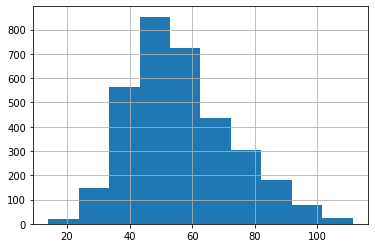

In [24]:
tel['MonthlyFee'].hist()

대부분 평균 요금이 50~60인 고객들이 많다.<br>\
그래프로 보면 평균보다 2배 높은 100을 넘는 사람들도 보인다.

## 월 평균 요금이 25이하의 사람들과 100의 사람들의 사용량 비교

In [25]:
tel_Fee_25 = (tel['MonthlyFee'] <= 25)
tel_Fee_100 = (tel['MonthlyFee'] >= 100)

In [26]:
tel_Fee_25.value_counts() #월 평균 요금이 25이하인 사람들은 30명이다

False    3303
True       30
Name: MonthlyFee, dtype: int64

In [27]:
tel_Fee_100.value_counts() #월 평균 요금이 100이상인 사람들은 33명이다.

False    3300
True       33
Name: MonthlyFee, dtype: int64

In [28]:
cols = ['DataAmount','CalMins','CalCounts']

In [29]:
Fee_25 = tel.loc[tel_Fee_25,cols]
Fee_25 

,DataAmount,CalMins,CalCounts
77,0.21,61.6,117
114,0.00,58.9,125
181,0.00,58.2,94
472,0.00,69.1,117
523,0.00,45.0,108
585,0.00,55.3,102
821,0.00,105.8,110
834,0.00,76.4,116
925,0.00,84.2,134
1052,0.00,12.5,67


In [30]:
Fee_100 = tel.loc[tel_Fee_100,cols]
Fee_100

,DataAmount,CalMins,CalCounts
115,5.40,196.8,89
198,3.73,292.9,101
228,3.59,280.2,136
469,4.64,194.4,63
514,3.78,265.9,113
542,3.83,237.5,120
569,4.16,221.1,137
575,3.83,309.9,90
579,4.46,186.7,108
646,4.16,235.6,74


In [31]:
Fee_25_re = Fee_25.mean()
Fee_25_re

DataAmount     0.038667
CalMins       49.630000
CalCounts     96.800000
dtype: float64

### 월 평균 요금이 25 이하인 사람들의 사용량
데이터 사용량 : 0.04GB <br> 월별 평균 전화량 : 50분 <br> 월별 평균 전화횟수 : 97회

In [32]:
Fee_100_re = Fee_100.mean()
Fee_100_re

DataAmount      3.919394
CalMins       257.727273
CalCounts     101.363636
dtype: float64

### 월 평균 요금이 100 이상인 사람들의 사용량
데이터 사용량 : 3.92GB <br> 월별 평균 전화량 : 258분 <br> 월별 평균 전화횟수 : 101회

## 비교 
데이터 사용량 차이 : 3.88GB <br>
월별 평균 전화량 : 202분 <br>
월별 평균 전화횟수 : 4회


### 전화횟수 차이는 별로 없지만 데이터 사용량과 전화량 차이는 엄청 많이 난다는 것을 알 수 있다.

---

## 평균 이상으로 데이터, 전화를 한 이용자의 가입기간

평균 데이터 사용량 : 0.82GB <br>
평균 전화량 : 180분 <br>
평균 전화 횟수 : 100회 <br>

In [35]:
avg_data = (tel['DataAmount'] > tel['DataAmount'].mean())
avg_mins = (tel['CalMins'] > tel['CalMins'].mean())
avg_counts = (tel['CalCounts'] > tel['CalCounts'].mean())
avg = avg_data & avg_mins & avg_counts

In [38]:
avg.value_counts()

False    3102
True      231
dtype: int64

모든 사용량이 평균을 넘는 이용자는 총 231명이다.

In [40]:
tel_avg = tel.MemberWeeks.loc[avg]
tel_avg

0       128
16       85
26       57
38      136
57      121
       ... 
3276    142
3286    106
3287    170
3305     58
3332     74
Name: MemberWeeks, Length: 231, dtype: int64

In [43]:
tel_avg.describe().T

count    231.000000
mean     101.515152
std       40.087171
min        1.000000
25%       72.500000
50%      104.000000
75%      131.000000
max      199.000000
Name: MemberWeeks, dtype: float64

가입 기간 평균 : 101주 <br>
가입 기간 최대 : 199주 <br>
가입 기간 최대 : 1주 

<bound method Axes.plot of <AxesSubplot:>>

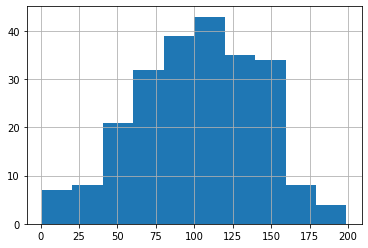

In [54]:
tel_avg.hist().plot